In [9]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt

In [10]:
class Kmeans:
    '''Implementing Kmeans algorithm.'''

    def __init__(self, n_clusters, max_iter=100, random_state=123):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def initializ_centroids(self, X):
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids

    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)

    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
    def fit(self, X):
        self.centroids = self.initializ_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)
    
    def predict(self, X):
        distance = self.compute_distance(X, self.centroids)
        return self.find_closest_cluster(distance)

### Problem 1

In [4]:
d1 = np.genfromtxt('02-02prob1.csv',delimiter=',')
d1[:5]

array([[-1.97407162,  0.3158997 ],
       [ 1.85979441,  6.35951086],
       [ 3.40341271,  6.05147589],
       [ 3.3115618 ,  4.93103311],
       [-6.14118783,  3.17116188]])

#### 1.1

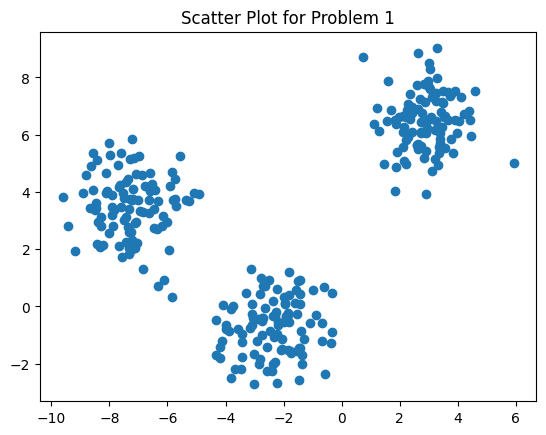

In [9]:
plt.scatter(d1[:,0], d1[:,1])
plt.title("Scatter Plot for Problem 1")
plt.show()

The scatter plot suggests that the dataset consists of 3 clusters

#### 1.2

**1. There are 3 parameters that can be changed on initialization:**
- n_cluster is the number of clusters. There is no default value for n_cluster, so it's required to define n_cluster when initializing an instance of Kmeans class.
- max_iteration defines at most how many iterations the main algorithm in the .fit() method would run. The default value is set to 100 iterations, but it's not neccessary but possible to be changed to a different value.
- random_state which is going to be used in the .initializ_centroids() method to help in randomly choosing the list of centroids.

**2. There are 2 stopping criteria for the .fit() method:**
- The algorithm stops when the centroids are converged. In another word, it checks if the centroids are no longer change between iterations. This criteria occurs in the if statement with the condition of np.all(old_centroids == self.centroids).
- As part of the for loop, the algorithm stops when it reaches the the maximum number of iterations even though the centroids have not been converged yet.

**3. The method produces/updates three attributes:**
- self.centroids: The .fit() method inintialize the list of centroids from random state and then keep updating them until one of the two stopping criteria happens, either the convergence or the maximum iterations.
- self.labels: The labels contains the assigned cluster label for each data point in the dataset, and the labels also get updated whenever the centroids get updated.
- self.error: The error in this case is the sum squared error (SSE) which needs to be recalculated everytime the centroids and the labels got updated. Lower SSE generally means better clustering.

#### 1.3 + 1.4 + 1.5

In [31]:
class Kmeans1:
    '''Implementing Kmeans algorithm.'''

    def __init__(self, n_clusters, max_iter=100, random_state=123):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def initializ_centroids(self, X):
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids

    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)

    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
    def fit(self, X):
        self.centroids = self.initializ_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)
    
    def predict(self, X):
        distance = self.compute_distance(X, self.centroids)
        return self.find_closest_cluster(distance)

    def print_centroids(self):
        return self.centroids

    def display_cluster(self, X):
        plt.scatter(X[:,0], X[:,1], c = self.labels)
        plt.scatter(self.centroids[:,0], self.centroids[:,1], c = 'black')
        plt.title("Scatter of Data Clusters and Centroids")
        plt.show()

    def display_fit(self, X):
        self.centroids = self.initializ_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            self.display_cluster(X)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)

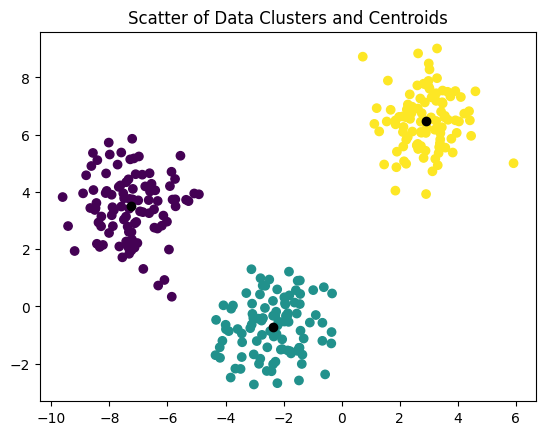

In [45]:
kmeans1 = Kmeans1(3)
kmeans1.fit(d1)
kmeans1.display_cluster(d1)

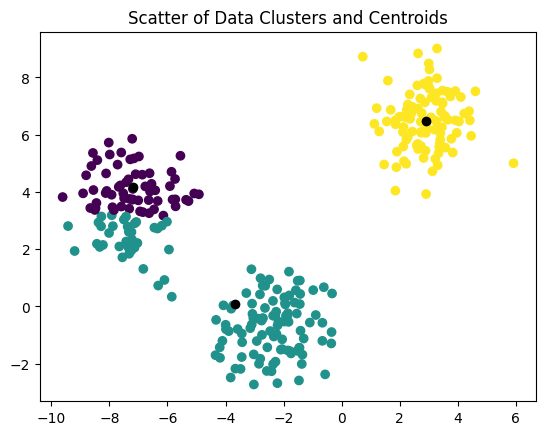

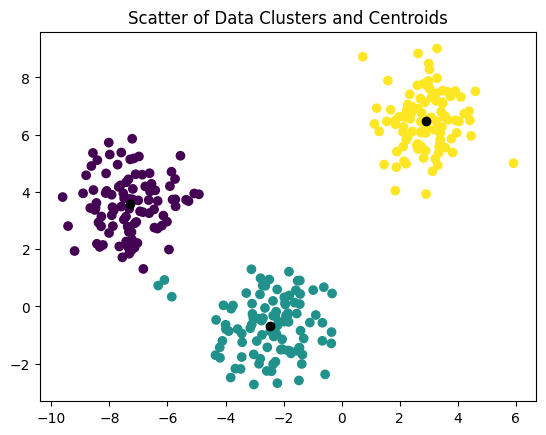

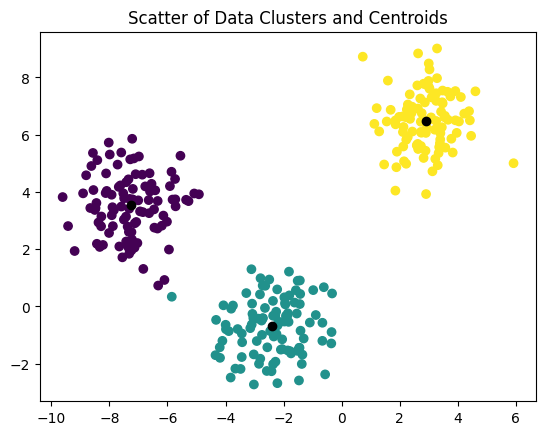

In [47]:
kmeans2 = Kmeans1(n_clusters = 3, max_iter = 3)
kmeans2.display_fit(d1)

### Problem 2

In [48]:
d2 = np.genfromtxt('02-02prob2.csv',delimiter=',')
d2[:5]

array([[ -0.02974639,  -2.07927413,   2.92777977,  -9.14924375,
          5.42735655,  -1.60764731, -10.39952284],
       [  1.08514774,  -3.10219352,   3.4916908 ,  -9.04304804,
          6.97004676,  -2.85064998,  -9.74595367],
       [ -5.75909103,  -2.92472797,  -3.89033289,   4.33267537,
         -2.12219041,   4.53668466,  -9.0670948 ],
       [ -2.93768217,   4.10247116,  -5.98033555,   7.45348079,
          1.92148669,   6.63622289,   7.44312348],
       [ -7.12641892,  -4.76215723,  -6.5501398 ,   4.61052819,
         -1.75307239,   5.90136349,  -9.93415563]])

In [103]:
def elbow1(n):
    sse_values = []
    k_values = np.arange(1,n+1)
    for i in k_values:
        kmeans3 = Kmeans1(i)
        kmeans3.fit(d2)
        sse_values.append(kmeans3.error)
    plt.plot(k_values, sse_values, marker = '.')    
    plt.title("Elbow Plot of Sum Squared Error vs. Number of Clusters")
    plt.xlabel("k")
    plt.ylabel("SSE(k)")

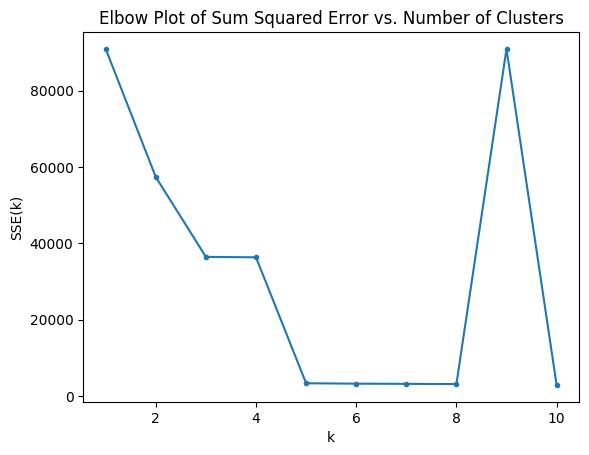

In [106]:
elbow1(10)

Based on the conversation on this [stack_overflow link](https://stats.stackexchange.com/questions/460839/elbow-method-not-giving-a-proper-curve), the random state to choose the centroids might cause the weirdness in the elbow plot. From my understanding, we need to try with more initialization to end up having the minimum SSE.

In [ ]:
def elbow2(n):
    sse_values = []
    k_values = np.arange(1,n+1)
    for i in k_values:
        min_sse = -1
        for j in np.arange (0,10):
            kmeans3 = Kmeans1(i, max_iter=10000)
            kmeans3.fit(d2)
            if min_sse == -1: 
                min_sse = kmeans3.error
            if min_sse > kmeans3.error:
                min_sse = kmeans3.error
        sse_values.append(min_sse)
    plt.plot(k_values, sse_values, marker = '.')    
    plt.title("Elbow Plot of Sum Squared Error vs. Number of Clusters")
    plt.xlabel("k")
    plt.ylabel("SSE(k)")

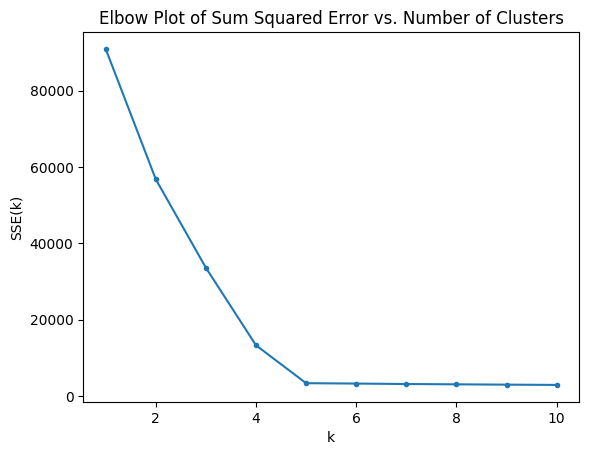

In [99]:
elbow2(10)

### Problem 3

In [40]:
import os
import gzip
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [41]:
def load_mnist(path, kind='train'):
    
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

#### 3.1

In [68]:
train_images, train_labels = load_mnist('/home/student/huquach/SubmitCS323_1/data')
ntrain_images = ((train_images/255.)-.5)*2

In [81]:
print(ntrain_images)

[[-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 ...
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]]


In [70]:
X_train, X_valid, y_train, y_valid = train_test_split(ntrain_images, train_labels, test_size=6000)
X_valid.shape

(6000, 784)

#### 3.2

In [47]:
##########################
### MODEL
##########################

def sigmoid(z):                                        
    return 1. / (1. + np.exp(-z))


def int_to_onehot(y, num_labels):

    ary = np.zeros((y.shape[0], num_labels))
    for i, val in enumerate(y):
        ary[i, val] = 1

    return ary


class NeuralNetMLP:

    def __init__(self, num_features, num_hidden, num_classes, random_seed=123):
        super().__init__()
        
        self.num_classes = num_classes
        
        # hidden
        rng = np.random.RandomState(random_seed)
        
        self.weight_h = rng.normal(
            loc=0.0, scale=0.1, size=(num_hidden, num_features))
        self.bias_h = np.zeros(num_hidden)
        
        # output
        self.weight_out = rng.normal(
            loc=0.0, scale=0.1, size=(num_classes, num_hidden))
        self.bias_out = np.zeros(num_classes)
        
    def forward(self, x):
        # Hidden layer
        # input dim: [n_examples, n_features] dot [n_hidden, n_features].T
        # output dim: [n_examples, n_hidden]
        z_h = np.dot(x, self.weight_h.T) + self.bias_h
        a_h = sigmoid(z_h)

        # Output layer
        # input dim: [n_examples, n_hidden] dot [n_classes, n_hidden].T
        # output dim: [n_examples, n_classes]
        z_out = np.dot(a_h, self.weight_out.T) + self.bias_out
        a_out = sigmoid(z_out)
        return a_h, a_out

    def backward(self, x, a_h, a_out, y):  
    
        #########################
        ### Output layer weights
        #########################
        
        # onehot encoding
        y_onehot = int_to_onehot(y, self.num_classes)

        # Part 1: dLoss/dOutWeights
        ## = dLoss/dOutAct * dOutAct/dOutNet * dOutNet/dOutWeight
        ## where DeltaOut = dLoss/dOutAct * dOutAct/dOutNet
        ## for convenient re-use
        
        # input/output dim: [n_examples, n_classes]
        d_loss__d_a_out = 2.*(a_out - y_onehot) / y.shape[0]

        # input/output dim: [n_examples, n_classes]
        d_a_out__d_z_out = a_out * (1. - a_out) # sigmoid derivative

        # output dim: [n_examples, n_classes]
        delta_out = d_loss__d_a_out * d_a_out__d_z_out # "delta (rule) placeholder"

        # gradient for output weights
        
        # [n_examples, n_hidden]
        d_z_out__dw_out = a_h
        
        # input dim: [n_classes, n_examples] dot [n_examples, n_hidden]
        # output dim: [n_classes, n_hidden]
        d_loss__dw_out = np.dot(delta_out.T, d_z_out__dw_out)
        d_loss__db_out = np.sum(delta_out, axis=0)
        

        #################################        
        # Part 2: dLoss/dHiddenWeights
        ## = DeltaOut * dOutNet/dHiddenAct * dHiddenAct/dHiddenNet * dHiddenNet/dWeight
        
        # [n_classes, n_hidden]
        d_z_out__a_h = self.weight_out
        
        # output dim: [n_examples, n_hidden]
        d_loss__a_h = np.dot(delta_out, d_z_out__a_h)
        
        # [n_examples, n_hidden]
        d_a_h__d_z_h = a_h * (1. - a_h) # sigmoid derivative
        
        # [n_examples, n_features]
        d_z_h__d_w_h = x
        
        # output dim: [n_hidden, n_features]
        d_loss__d_w_h = np.dot((d_loss__a_h * d_a_h__d_z_h).T, d_z_h__d_w_h)
        d_loss__d_b_h = np.sum((d_loss__a_h * d_a_h__d_z_h), axis=0)

        return (d_loss__dw_out, d_loss__db_out, 
                d_loss__d_w_h, d_loss__d_b_h)

In [ ]:
num_epochs = 50
minibatch_size = 100

def minibatch_generator(X, y, minibatch_size):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    for start_idx in range(0, indices.shape[0] - minibatch_size 
                           + 1, minibatch_size):
        batch_idx = indices[start_idx:start_idx + minibatch_size]
        
        yield X[batch_idx], y[batch_idx]

print(f'Initial validation MSE: {mse:.1f}')
print(f'Initial validation accuracy: {acc*100:.1f}%')

In [71]:
def mse_loss(targets, probas, num_labels=10):
    onehot_targets = int_to_onehot(targets, num_labels=num_labels)
    return np.mean((onehot_targets - probas)**2)


def accuracy(targets, predicted_labels):
    return np.mean(predicted_labels == targets) 


_, probas = model.forward(X_valid)
mse = mse_loss(y_valid, probas)

predicted_labels = np.argmax(probas, axis=1)
acc = accuracy(y_valid, predicted_labels)

In [72]:
def compute_mse_and_acc(nnet, X, y, num_labels=10, minibatch_size=100):
    mse, correct_pred, num_examples = 0., 0, 0
    minibatch_gen = minibatch_generator(X, y, minibatch_size)
        
    for i, (features, targets) in enumerate(minibatch_gen):

        _, probas = nnet.forward(features)
        predicted_labels = np.argmax(probas, axis=1)
        
        onehot_targets = int_to_onehot(targets, num_labels=num_labels)
        loss = np.mean((onehot_targets - probas)**2)
        correct_pred += (predicted_labels == targets).sum()
        
        num_examples += targets.shape[0]
        mse += loss

    mse = mse/(i+1)
    acc = correct_pred/num_examples
    return mse, acc

In [73]:
def train(model, X_train, y_train, X_valid, y_valid, num_epochs,
          learning_rate=0.1):
    
    epoch_loss = []
    epoch_train_acc = []
    epoch_valid_acc = []
    
    for e in range(num_epochs):

        # iterate over minibatches
        minibatch_gen = minibatch_generator(
            X_train, y_train, minibatch_size)

        for X_train_mini, y_train_mini in minibatch_gen:
            
            #### Compute outputs ####
            a_h, a_out = model.forward(X_train_mini)

            #### Compute gradients ####
            d_loss__d_w_out, d_loss__d_b_out, d_loss__d_w_h, d_loss__d_b_h = \
                model.backward(X_train_mini, a_h, a_out, y_train_mini)

            #### Update weights ####
            model.weight_h -= learning_rate * d_loss__d_w_h
            model.bias_h -= learning_rate * d_loss__d_b_h
            model.weight_out -= learning_rate * d_loss__d_w_out
            model.bias_out -= learning_rate * d_loss__d_b_out
        
        #### Epoch Logging ####        
        train_mse, train_acc = compute_mse_and_acc(model, X_train, y_train)
        valid_mse, valid_acc = compute_mse_and_acc(model, X_valid, y_valid)
        train_acc, valid_acc = train_acc*100, valid_acc*100
        epoch_train_acc.append(train_acc)
        epoch_valid_acc.append(valid_acc)
        epoch_loss.append(train_mse)
        print(f'Epoch: {e+1:03d}/{num_epochs:03d} '
              f'| Train MSE: {train_mse:.2f} '
              f'| Train Acc: {train_acc:.2f}% '
              f'| Valid Acc: {valid_acc:.2f}%')

    return epoch_loss, epoch_train_acc, epoch_valid_acc

In [76]:
model = NeuralNetMLP(num_features=28*28, num_hidden=50, num_classes=10)
np.random.seed(123)
epoch_loss, epoch_train_acc, epoch_valid_acc = train(model, X_train, y_train, X_valid, y_valid, num_epochs=50, learning_rate=0.1)

Epoch: 001/050 | Train MSE: 0.05 | Train Acc: 71.98% | Valid Acc: 71.20%
Epoch: 002/050 | Train MSE: 0.04 | Train Acc: 76.44% | Valid Acc: 76.03%
Epoch: 003/050 | Train MSE: 0.03 | Train Acc: 79.84% | Valid Acc: 79.73%
Epoch: 004/050 | Train MSE: 0.03 | Train Acc: 81.24% | Valid Acc: 81.13%
Epoch: 005/050 | Train MSE: 0.03 | Train Acc: 82.52% | Valid Acc: 81.92%
Epoch: 006/050 | Train MSE: 0.03 | Train Acc: 83.14% | Valid Acc: 82.38%
Epoch: 007/050 | Train MSE: 0.03 | Train Acc: 83.56% | Valid Acc: 83.08%
Epoch: 008/050 | Train MSE: 0.02 | Train Acc: 83.77% | Valid Acc: 83.40%
Epoch: 009/050 | Train MSE: 0.02 | Train Acc: 84.43% | Valid Acc: 83.80%
Epoch: 010/050 | Train MSE: 0.02 | Train Acc: 84.75% | Valid Acc: 84.27%
Epoch: 011/050 | Train MSE: 0.02 | Train Acc: 84.96% | Valid Acc: 84.47%
Epoch: 012/050 | Train MSE: 0.02 | Train Acc: 85.38% | Valid Acc: 84.58%
Epoch: 013/050 | Train MSE: 0.02 | Train Acc: 85.62% | Valid Acc: 85.07%
Epoch: 014/050 | Train MSE: 0.02 | Train Acc: 85.87

With num_hidden = 50 and learning_rate = 0.1, my training and validation accuracy on the last epoch are 88.97% and 87.25%.

#### 3.3

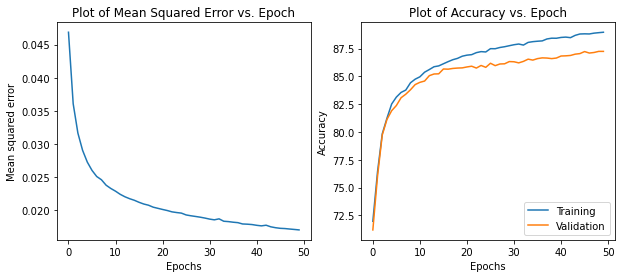

In [77]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
ax[0].plot(range(len(epoch_loss)), epoch_loss)
ax[0].set_ylabel('Mean squared error')
ax[0].set_xlabel('Epochs')
ax[0].set_title('Plot of Mean Squared Error vs. Epoch')

ax[1].plot(range(len(epoch_train_acc)), epoch_train_acc,
         label='Training')
ax[1].plot(range(len(epoch_valid_acc)), epoch_valid_acc,
         label='Validation')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_title('Plot of Accuracy vs. Epoch')
ax[1].legend(loc='lower right')
plt.show()

In [80]:
test_images, test_labels = load_mnist('/home/student/huquach/SubmitCS323_1/data', kind='t10k')
n_Xtest = ((test_images/255.)-.5)*2
test_mse, test_acc = compute_mse_and_acc(model, n_Xtest, test_labels)
print(f'The final test accuracy is {test_acc*100:.2f}%')

The final test accuracy is 86.28%
